In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision.utils import save_image

import os

import numpy as np
import matplotlib.pyplot as plt

from networks import UNet, GrowingUNet
from solve import solve

In [2]:
learning_rate = 2e-4
image_size = 16
batch_size = 1
epochs = 10
epoch_size = 300
experiment = 'notebook'

os.makedirs(experiment, exist_ok=True)

# Set up CUDA
dtype = torch.cuda.FloatTensor

# Define physics loss
def PhysicalLoss():
    kernel = Variable(torch.Tensor(np.array([[[[0, 1/4, 0], [1/4, -1, 1/4], [0, 1/4, 0]]]]))).type(dtype)
    def loss(img):
        return F.conv2d(img, kernel).abs().mean()
    return loss

net = GrowingUNet(dtype, image_size).type(dtype)
print(net)

physical_loss = PhysicalLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

fixed_sample_0 = torch.zeros(1,1,image_size,image_size)
fixed_sample_0[:,:,:,0] = 100
fixed_sample_0[:,:,0,:] = 0
fixed_sample_0[:,:,:,-1] = 100
fixed_sample_0[:,:,-1,:] = 0
fixed_sample_0 = Variable(fixed_sample_0).cuda()

fixed_sample_1 = torch.zeros(1,1,image_size,image_size)
fixed_sample_1[:,:,:,0] = 100
fixed_sample_1[:,:,0,:] = 100
fixed_sample_1[:,:,:,-1] = 100
fixed_sample_1[:,:,-1,:] = 100
fixed_sample_1 = Variable(fixed_sample_1).cuda()

boundary = np.zeros((image_size, image_size), dtype=np.bool)
boundary[0,:] = True
boundary[-1,:] = True
boundary[:,0] = True
boundary[:,-1] = True

fixed_solution_0 = solve(fixed_sample_0.cpu().data.numpy()[0,0,:,:], boundary)
fixed_solution_1 = solve(fixed_sample_1.cpu().data.numpy()[0,0,:,:], boundary)

## Training loop
data = torch.zeros(batch_size,1,image_size,image_size)
for epoch in range(epochs):
    for sample in range(epoch_size):
        data[:,:,:,0] = np.random.uniform(100)
        data[:,:,0,:] = np.random.uniform(100)
        data[:,:,:,-1] = np.random.uniform(100)
        data[:,:,-1,:] = np.random.uniform(100)
        img = Variable(data).type(dtype)
        output = net(img)
        loss = physical_loss(output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, epochs, loss.data[0]))

    # Plot real samples
#     plt.figure(figsize=(20, 15))
#     f_0 = net(fixed_sample_0)
#     f_1 = net(fixed_sample_1)
#     XX, YY = np.meshgrid(np.arange(0, image_size), np.arange(0, image_size))
#     plt.subplot(2,2,1)
#     plt.contourf(XX, YY, f_0.cpu().data.numpy()[0,0,:,:], colorinterpolation=50, cmap=plt.cm.jet)
#     plt.axis('equal')
#     plt.subplot(2,2,2)
#     plt.contourf(XX, YY, f_1.cpu().data.numpy()[0,0,:,:], colorinterpolation=50, cmap=plt.cm.jet)
#     plt.axis('equal')
#     plt.subplot(2,2,3)
#     plt.contourf(XX, YY, fixed_solution_0, colorinterpolation=50, cmap=plt.cm.jet)
#     plt.axis('equal')
#     plt.subplot(2,2,4)
#     plt.contourf(XX, YY, fixed_solution_1, colorinterpolation=50, cmap=plt.cm.jet)
#     plt.axis('equal')
#     plt.savefig('%s/f_1_epoch%d.png' % (experiment, epoch))
#     plt.close()

    # checkpoint networks
#     if epoch % 5 == 0:
#         torch.save(net.state_dict(), '%s/net_epoch_%d.pth' % (experiment, epoch))

GrowingUNet(
  (encoding_layers): ModuleList(
    (0): Conv2d (1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): Conv2d (64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (2): Conv2d (128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): Conv2d (256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
  (encoding_bns): ModuleList(
    (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
  )
  (decoding_layers): ModuleList(
    (0): ConvTranspose2d (512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ConvTranspose2d (512, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (2): ConvTranspose2d (256, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ConvTranspose2d (128, 1, kernel_size=(4, 4), stride

TypeError: unorderable types: int() <= slice()

---

---

---

In [11]:
for i in net.state_dict():
    print(i)

ens.0.weight
ens.0.bias
ens.1.weight
ens.1.bias
ens.2.weight
ens.2.bias
ens.3.weight
ens.3.bias
dns.0.weight
dns.0.bias
dns.1.weight
dns.1.bias
dns.2.weight
dns.2.bias
dns.3.weight
dns.3.bias
ebns.0.weight
ebns.0.bias
ebns.0.running_mean
ebns.0.running_var
ebns.1.weight
ebns.1.bias
ebns.1.running_mean
ebns.1.running_var
ebns.2.weight
ebns.2.bias
ebns.2.running_mean
ebns.2.running_var
ebns.3.weight
ebns.3.bias
ebns.3.running_mean
ebns.3.running_var
dbns.0.weight
dbns.0.bias
dbns.0.running_mean
dbns.0.running_var
dbns.1.weight
dbns.1.bias
dbns.1.running_mean
dbns.1.running_var
dbns.2.weight
dbns.2.bias
dbns.2.running_mean
dbns.2.running_var
dbns.3.weight
dbns.3.bias
dbns.3.running_mean
dbns.3.running_var


In [51]:
net1 = UNet(dtype, image_size=32).type(dtype)

In [58]:
print("Net1:")
for i in net1.ens:
    print(i)
print("Net:")
for i in net.ens:
    print(i)

Net1:
Conv2d (1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Conv2d (64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Conv2d (128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Conv2d (256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Conv2d (512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Net:
Conv2d (1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Conv2d (64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Conv2d (128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
Conv2d (256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))


In [55]:
for i in net1.dns[0].state_dict():
    print(i)

weight
bias


In [45]:
for i in net1.state_dict():
    print ("module: ", i)
    if i in net.state_dict():
        print ("exists in smaller network")
        print(net1.state_dict()[i].size())
        print(net.state_dict()[i].size())
        if net1.state_dict()[i].equal(net.state_dict()[i]):
            print ("equal in smaller network")
#             print (net1.state_dict()[i])

module:  ens.0.weight
exists in smaller network
torch.Size([64, 1, 4, 4])
torch.Size([64, 1, 4, 4])
module:  ens.0.bias
exists in smaller network
torch.Size([64])
torch.Size([64])
module:  ens.1.weight
exists in smaller network
torch.Size([128, 64, 4, 4])
torch.Size([128, 64, 4, 4])
module:  ens.1.bias
exists in smaller network
torch.Size([128])
torch.Size([128])
module:  ens.2.weight
exists in smaller network
torch.Size([256, 128, 4, 4])
torch.Size([256, 128, 4, 4])
module:  ens.2.bias
exists in smaller network
torch.Size([256])
torch.Size([256])
module:  ens.3.weight
exists in smaller network
torch.Size([512, 256, 4, 4])
torch.Size([512, 256, 4, 4])
module:  ens.3.bias
exists in smaller network
torch.Size([512])
torch.Size([512])
module:  ens.4.weight
module:  ens.4.bias
module:  dns.0.weight
exists in smaller network
torch.Size([512, 512, 4, 4])
torch.Size([512, 256, 4, 4])
module:  dns.0.bias
exists in smaller network
torch.Size([512])
torch.Size([256])
module:  dns.1.weight
exists

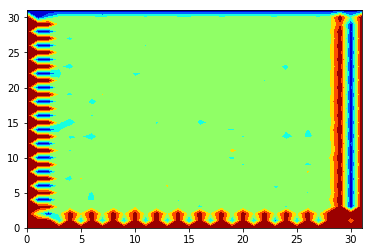

In [33]:
data = torch.zeros(batch_size,1,32,32)
for sample in range(epoch_size):
    data[:,:,:,0] = 100
    data[:,:,0,:] = 0
    data[:,:,:,-1] = 100
    data[:,:,-1,:] = 0
out = net1(Variable(data).type(dtype))

plt.close()
XX, YY = np.meshgrid(np.arange(0, 32), np.arange(0, 32))
plt.contourf(XX, YY, out.cpu().data.numpy().squeeze(), colorinterpolation=50, vmin=0, vmax=100, cmap=plt.cm.jet)
plt.show()

---

---

---

In [51]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from torchvision.utils import save_image

import numpy as np
import matplotlib.pyplot as plt
import functools

from networks import UnetGenerator
from datasets import loadHeat

%autosave 100

def to_img(x, data_size):
#     x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, data_size, data_size)
    return x

Autosaving every 100 seconds


In [52]:
# Define training parameters
batch_size=1
learning_rate = 2e-4
num_epochs = 2000
epoch_size = 360

In [53]:
# Input image handling
data_size = 32
dataset = loadHeat(data_size, ground_truth=False)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [54]:
center_mask = torch.zeros(1,32,32).unsqueeze(0)
center_mask[:,:,:,0] = 1
center_mask[:,:,0,:] = 1
center_mask[:,:,:,-1] = 1
center_mask[:,:,-1,:] = 1

boundary_mask = 1 - center_mask

class UNet(nn.Module):
    # UNet for Heat Transport
    def __init__(self, image_size=32, max_temp=100, num_filters=64):
        super(UNet, self).__init__()

        self.max_temp = max_temp

        self.conv1 = nn.Conv2d(1, num_filters, kernel_size=4, stride=2,padding=1)
        self.conv2 = nn.Conv2d(num_filters, num_filters*2, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(num_filters*2, num_filters*4, kernel_size=4, stride=2, padding=1)
        self.conv4 = nn.Conv2d(num_filters*4, num_filters*8, kernel_size=4, stride=2, padding=1)
        self.conv5 = nn.Conv2d(num_filters*8, num_filters*8, kernel_size=4, stride=2, padding=1)

        self.ebn1 = nn.BatchNorm2d(num_filters)
        self.ebn2 = nn.BatchNorm2d(num_filters*2)
        self.ebn3 = nn.BatchNorm2d(num_filters*4)
        self.ebn4 = nn.BatchNorm2d(num_filters*8)
        self.ebn5 = nn.BatchNorm2d(num_filters*8)

        self.encoded = None # 4x4x4
        
        self.deconv1 = nn.ConvTranspose2d(num_filters*8, num_filters*8, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(num_filters*8*2, num_filters*4, kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(num_filters*4*2, num_filters*2, kernel_size=4, stride=2, padding=1)
        self.deconv4 = nn.ConvTranspose2d(num_filters*2*2, num_filters, kernel_size=4, stride=2, padding=1)
        self.deconv5 = nn.ConvTranspose2d(num_filters*2, 1, kernel_size=4, stride=2, padding=1)

        self.dbn1 = nn.BatchNorm2d(num_filters*8)
        self.dbn2 = nn.BatchNorm2d(num_filters*4)
        self.dbn3 = nn.BatchNorm2d(num_filters*2)
        self.dbn4 = nn.BatchNorm2d(num_filters)


    def forward(self, x):
        # encoder
        en_1 = F.leaky_relu(self.conv1(x), 0.2)
        en_2 = F.leaky_relu(self.ebn2(self.conv2(en_1)), 0.2)
        en_3 = F.leaky_relu(self.ebn3(self.conv3(en_2)), 0.2)
        en_4 = F.leaky_relu(self.ebn4(self.conv4(en_3)), 0.2)

        # encoded representation is (batch_size, num_filters*8, 1, 1)-dimensional encoding space
        self.encoded = self.conv5(en_4)
        
        # decoder
        de_1 = self.dbn1(self.deconv1(F.relu(self.encoded)))
        de_2 = self.dbn2(self.deconv2(F.relu(torch.cat((de_1, en_4), dim=1))))
        de_3 = self.dbn3(self.deconv3(F.relu(torch.cat((de_2, en_3), dim=1))))
        de_4 = self.dbn4(self.deconv4(F.relu(torch.cat((de_3, en_2), dim=1))))
        decoded = F.tanh(self.deconv5(F.relu(torch.cat((de_4, en_1), dim=1))))
        output = (decoded + 1)*self.max_temp / 2
        output = output*Variable(boundary_mask).cuda() + x*Variable(center_mask).cuda()
        return output

net = UNet().cuda()
print(net)

UNet(
  (conv1): Conv2d (1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d (64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d (128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d (256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv5): Conv2d (512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (ebn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (ebn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (ebn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
  (ebn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
  (ebn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
  (deconv1): ConvTranspose2d (512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv2): ConvTranspose2d (1024, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv3): ConvTranspose2d (512, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))


In [55]:
# Define physics loss
kernel = Variable(torch.Tensor(np.array([[[[0, 1/4, 0], [1/4, -1, 1/4], [0, 1/4, 0]]]]))).cuda()

def physical_loss(img):
    return F.conv2d(img, kernel).abs().mean()

criterion = physical_loss
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [56]:
# Outer training loop
## Training loop
data = torch.zeros(1,1,32,32)
for epoch in range(num_epochs):
    for sample in range(epoch_size):
        data[:,:,:,0] = np.random.uniform(100)
        data[:,:,0,:] = np.random.uniform(100)
        data[:,:,:,-1] = np.random.uniform(100)
        data[:,:,-1,:] = np.random.uniform(100)
        img = Variable(data).cuda()
        output = net(img)
#         output = (output+1)*50
#         output = output*boundary_mask + img*center_mask
        loss = criterion(output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.data[0]))
#     if epoch % 10 == 0:
#         train_pic = to_img(img.cpu().data)
#         gen_pic = to_img(output.cpu().data, data_size)
#         save_image(train_pic, './decoded_mnist/image_{}_train.png'.format(epoch))
#         save_image(gen_pic, './generated_heat_fields/image_{}_gen.png'.format(epoch), scale_each=True, range=(0,100))

epoch [1/2000], loss:1.1402
epoch [2/2000], loss:0.7278
epoch [3/2000], loss:0.4521
epoch [4/2000], loss:0.6054
epoch [5/2000], loss:0.4197
epoch [6/2000], loss:0.5104
epoch [7/2000], loss:0.7458
epoch [8/2000], loss:0.6473
epoch [9/2000], loss:0.6308
epoch [10/2000], loss:0.8299
epoch [11/2000], loss:0.5177
epoch [12/2000], loss:0.4445
epoch [13/2000], loss:0.3842
epoch [14/2000], loss:0.6460
epoch [15/2000], loss:0.3113
epoch [16/2000], loss:0.4726
epoch [17/2000], loss:1.0888
epoch [18/2000], loss:0.4417
epoch [19/2000], loss:0.2665
epoch [20/2000], loss:0.4074
epoch [21/2000], loss:0.7777
epoch [22/2000], loss:0.2888
epoch [23/2000], loss:0.2858
epoch [24/2000], loss:0.3013


KeyboardInterrupt: 

In [ ]:
## Save model

In [ ]:
# Output image handling

In [57]:
# heat = Variable(torch.Tensor(np.loadtxt('datasets/small_data/BC/0-10-20-90.csv', delimiter=','))).cuda()
heat = Variable(torch.Tensor(np.loadtxt('datasets/%d_small/BC/0-100-20-40.csv' % data_size, delimiter=','))).cuda()
truth = Variable(torch.Tensor(np.loadtxt('datasets/%d_small/field/0-100-20-40.csv' % data_size, delimiter=','))).cuda()

In [58]:
output = net(heat.unsqueeze(0).unsqueeze(0))

In [59]:
output

Variable containing:
(0 ,0 ,.,.) = 
   20.0000  100.0000  100.0000  ...   100.0000  100.0000   40.0000
   20.0000   64.1281   72.8604  ...    83.7566   77.3496   40.0000
   20.0000   23.3165   12.2718  ...    73.6453   62.5778   40.0000
              ...                ⋱                ...             
   20.0000   18.2487   18.6812  ...    27.4844   33.4701   40.0000
   20.0000   22.3977   15.6183  ...    23.8701   16.1801   40.0000
   20.0000    0.0000    0.0000  ...     0.0000    0.0000   40.0000
[torch.cuda.FloatTensor of size 1x1x32x32 (GPU 0)]

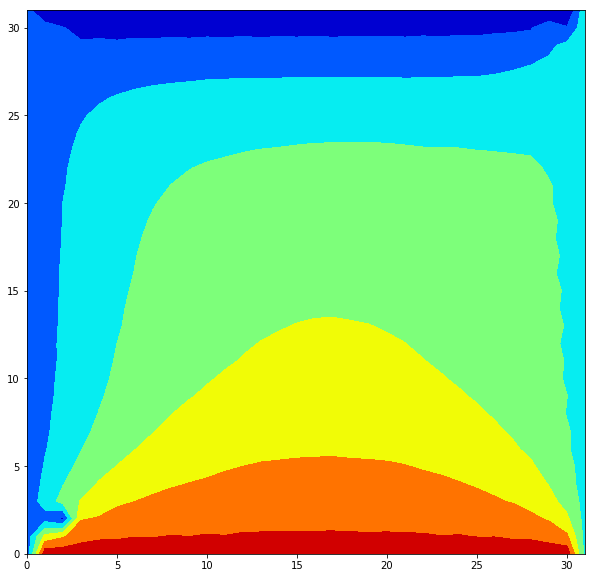

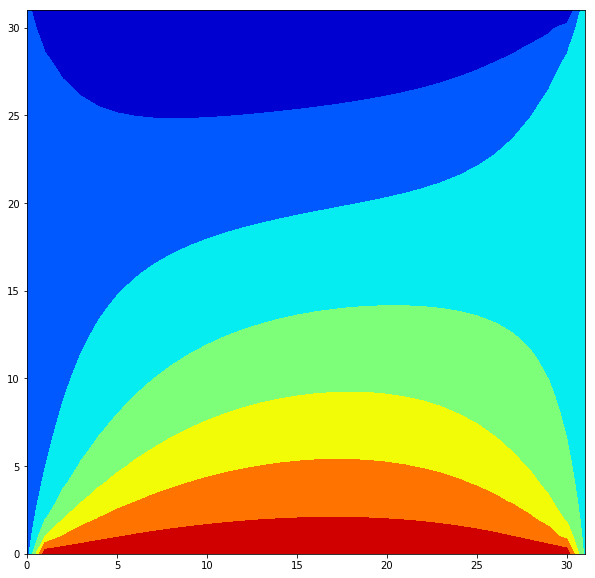

In [60]:
plt.figure(figsize=(10,10))
XX, YY = np.meshgrid(np.arange(0, data_size), np.arange(0, data_size))
plt.contourf(XX, YY, output.cpu().data.numpy()[0,0,:,:], colorinterpolation=50, cmap=plt.cm.jet)
# plt.imshow(output.cpu().data.numpy()[0,0,:,:])
# plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
XX, YY = np.meshgrid(np.arange(0, data_size), np.arange(0, data_size))
plt.contourf(XX, YY, truth.cpu().data.numpy(), colorinterpolation=50, cmap=plt.cm.jet)
# plt.imshow(truth.cpu().data.numpy())
# plt.colorbar()
plt.show()

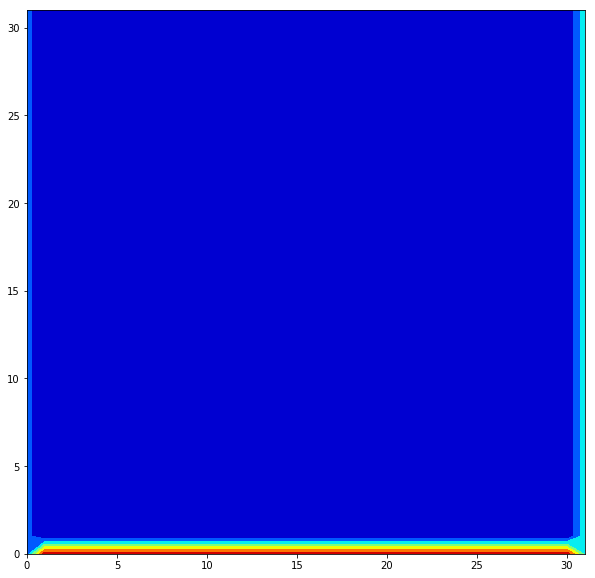

In [40]:
plt.figure(figsize=(10,10))
XX, YY = np.meshgrid(np.arange(0, data_size), np.arange(0, data_size))
plt.contourf(XX, YY, heat.cpu().data.numpy(), colorinterpolation=50, cmap=plt.cm.jet)
# plt.imshow(output.cpu().data.numpy()[0,0,:,:])
# plt.colorbar()
plt.show()

---

---

---

---

---

---
# Miscellaneous Tests

In [4]:
# Initialize U-Net (or ResNet) convolutional architecture
net = UnetGenerator(1, 1, 4, ngf=64, norm_layer=functools.partial(nn.BatchNorm2d, affine=True), use_dropout=False, gpu_ids=[]).cuda()

class Codec(nn.Module):
    # Autoencoder for MNIST images
    def __init__(self):
        super(Codec, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pad = nn.ZeroPad2d((0,1,0,1))
        self.conv3 = nn.Conv2d(32, 4, kernel_size=3, padding=1)
        
        self.encoded = None # 4x4x4
        
        self.deconv1 = nn.ConvTranspose2d(32, 16, kernel_size=3, padding=1, stride=2)
        self.deconv2 = nn.ConvTranspose2d(16, 16, kernel_size=3, padding=1, stride=2)
        self.deconv3 = nn.ConvTranspose2d(16, 16, kernel_size=4)
        
        self.decode_conv = nn.Conv2d(16, 1, kernel_size=3, padding=1)
        
    def forward(self, x):
        # encoder
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        self.encoded = F.max_pool2d(self.pad(F.relu(self.conv3(x))), 2)

        # encoded representation is 8x4x4 = 128-dimensional encoding space

        # decoder
        x = F.relu(self.deconv1(x))
        x = F.relu(self.deconv2(x))
        x = F.relu(self.deconv3(x))
        decoded = F.sigmoid(self.decode_conv(x))*100
        return decoded

# net = Codec().cuda()

print(net)

UnetGenerator (
  (model): UnetSkipConnectionBlock (
    (model): Sequential (
      (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): UnetSkipConnectionBlock (
        (model): Sequential (
          (0): LeakyReLU (0.2, inplace)
          (1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
          (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
          (3): UnetSkipConnectionBlock (
            (model): Sequential (
              (0): LeakyReLU (0.2, inplace)
              (1): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
              (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
              (3): UnetSkipConnectionBlock (
                (model): Sequential (
                  (0): LeakyReLU (0.2, inplace)
                  (1): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
                  (2): BatchNorm2d(5

In [2]:
kernel_ = np.array([[0, 1/4, 0], [1/4, -1, 1/4], [0, 1/4, 0]])
kernel = Variable(torch.Tensor(kernel_))
img = Variable(torch.rand(10,10))

def physical_loss(img):
#     return F.conv2d((img.unsqueeze(0)).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0)).norm()
    return F.conv2d((img.unsqueeze(0)).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))

In [4]:
physical_loss(img)

Variable containing:
(0 ,0 ,.,.) = 
  0.0292  0.3121 -0.2342 -0.1250 -0.2445 -0.3733 -0.2806 -0.1527
 -0.1400  0.0060  0.4090 -0.1374  0.3424  0.0427  0.4813 -0.0692
 -0.4020  0.5477 -0.7780  0.2630  0.0718  0.2802  0.2284 -0.6202
  0.1652 -0.6265  0.2452  0.3149 -0.2875 -0.3081 -0.1356  0.6590
 -0.3522  0.6148 -0.2975  0.1686 -0.2690 -0.1233  0.1784 -0.2472
 -0.0768 -0.2584  0.2547  0.2669 -0.1479  0.3965  0.1607  0.1083
 -0.4120  0.3863  0.2018 -0.5286  0.2726 -0.0041 -0.4462  0.2418
  0.5019  0.2671 -0.2837 -0.2454 -0.3699 -0.2484  0.1922  0.3512
[torch.FloatTensor of size 1x1x8x8]

In [5]:
# Heat is true ground truth solution
heat_ = np.loadtxt('datasets/32_small/field/0-10-20-90.csv', delimiter=',')
heat = Variable(torch.Tensor(heat_))
heat

Variable containing:
 20.0000  10.0000  10.0000  ...   10.0000  10.0000  90.0000
 20.0000  15.0134  13.0503  ...   34.1378  49.9750  90.0000
 20.0000  17.0032  15.0536  ...   49.8999  65.7621  90.0000
           ...               ⋱              ...            
 20.0000  13.9912  10.0765  ...   44.9228  62.7501  90.0000
 20.0000  10.0191   6.0853  ...   27.1727  44.9807  90.0000
 20.0000   0.0000   0.0000  ...    0.0000   0.0000  90.0000
[torch.FloatTensor of size 64x64]

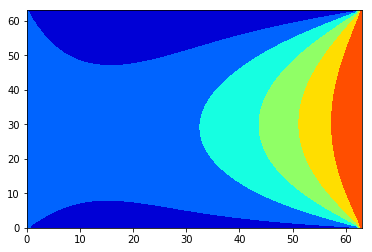

In [6]:
XX, YY = np.meshgrid(np.arange(0, 64), np.arange(0, 64))
plt.contourf(XX, YY, heat.data.numpy(), colorinterpolation=50, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.show()

In [7]:
physical_loss(heat)

Variable containing:
(0 ,0 ,.,.) = 
1.00000e-03 *
  0.0072  0.0136  0.0191  ...   0.0143  0.0095  0.0038
  0.0143  0.0234  0.0329  ...   0.0257  0.0124  0.0038
  0.0191  0.0334  0.0458  ...   0.0334  0.0191  0.0076
           ...             ⋱             ...          
  0.0148  0.0229  0.0327  ...   0.0210  0.0095  0.0057
  0.0088  0.0143  0.0199  ...   0.0114  0.0081 -0.0010
  0.0038  0.0052  0.0072  ...   0.0043  0.0010 -0.0019
[torch.FloatTensor of size 1x1x62x62]

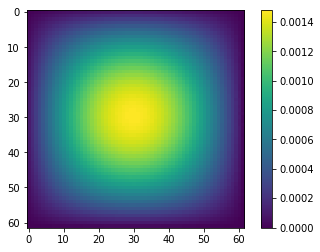

In [8]:
# Ground truth satisfies small value when kernel is applied
plt.imshow(physical_loss(heat).data.numpy()[0,0,:,:])
plt.colorbar()
plt.show()

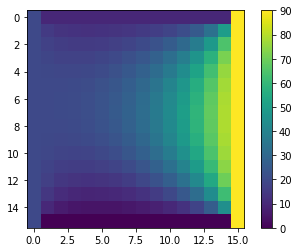

In [64]:
heat_ = np.loadtxt('datasets/16/field/0-10-20-90.csv', delimiter=',')
heat = Variable(torch.Tensor(heat_)).cuda()
plt.imshow(heat.cpu().data.numpy())
plt.colorbar()
plt.show()

In [72]:
ker = Variable(torch.ones(32,1,1,1)).cuda()
out = F.conv2d(heat.unsqueeze(0).unsqueeze(0), ker)
out.size()

torch.Size([1, 32, 16, 16])

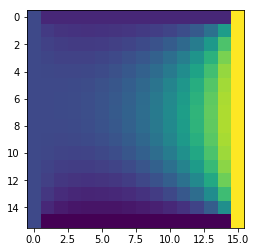

In [74]:
plt.imshow(out.cpu().data.numpy()[0,2,:,])
plt.show()

In [75]:
out.size()

torch.Size([1, 32, 16, 16])

In [78]:
ker2 = Variable(torch.ones(1,32,1,1)).cuda()
out2 = F.conv2d(out, ker2)

In [79]:
out2.size()

torch.Size([1, 1, 16, 16])